<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing US Economic Data and  Building a Dashboard  </h1>
<h2>Description</h2>

Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data.
<p>
<a href="https://en.wikipedia.org/wiki/Gross_domestic_product"> Gross domestic product (GDP)</a> is a measure of the market value of all the final goods and services produced in a period. GDP is an indicator of how well the economy is doing. A drop in GDP indicates the economy is producing less; similarly an increase in GDP suggests the economy is performing better. In this lab, you will examine how changes in GDP impact the unemployment rate. You will take screen shots of every step, you will share the notebook and the URL pointing to the dashboard.</p>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Section_1"> Define a Function that Makes a Dashboard </a></li>
    <li><a href="#Section_2"> Create a dataframe that contains the GDP data and display it</a> </li>
    <li><a href="#Section_3"> Create a dataframe that contains the unemployment data and display it</a></li>
    <li><a href="#Section_4"> Display a dataframe where unemployment was greater than 8.5%</a></li>
    <li><a href="#Section_5"> Use the function make_dashboard to make a dashboard</a></li>
        <li><a href="#Section_6"> Saving the dashboard on IBM cloud and display it</a></li>
    </ul>
<p>
</div>

<hr>

<h2 id="Section_1"> Define Function that Makes a Dashboard  </h2>
We will import the following libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt,mpld3     #importing mpld3 for saving figure into HTML format
%matplotlib inline

In this section, we define the function <code>make_dashboard</code>. 
You don't have to know how the function works, you should only care about the inputs. The function will produce a dashboard as well as an html file. You can then use this html file to share your dashboard. If you do not know what an html file is don't worry everything you need to know will be provided in the lab. 

In [33]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    analyze,axis=plt.subplots(figsize=(10,9))
    axis.plot(x,gdp_change,color='firebrick',lw=4,label="% GDP change")
    axis.plot(x,unemployment,lw=4,label="% unemployed")
    axis.set_xlabel("Year",fontsize=18)
    axis.set_ylabel("%",fontsize=18)
    axis.set_title(title,fontsize=20)
    axis.grid(True)
    axis.legend(loc=0)
    mpld3.save_html(analyze,file_name)

The dictionary links contain the CSV files with all the data. The value for the key GDP is the file that contains the GDP data. The value for the key unemployment contains the unemployment data.

In [6]:
links={'GDP':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv',\
       'unemployment':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'}

<h3 id="Section_2"> Create a dataframe that contains the GDP data and display the first five rows of the dataframe.</h3>

In [7]:
gdp=pd.read_csv(links["GDP"])
gdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


<h3 id="Section_2"> Create a dataframe that contains the unemployment data. Display the first five rows of the dataframe. </h3>

In [8]:
unemply=pd.read_csv(links["unemployment"])
unemply.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


<h3 id="Section_3"> Display a dataframe where unemployment was greater than 8.5%.</h3>

In [11]:
df=unemply[unemply["unemployment"]>8.5]
df

,date,unemployment
34,1982,9.708333
35,1983,9.600000
61,2009,9.283333
62,2010,9.608333
63,2011,8.933333


<h3 id="Section_4"> Use the function make_dashboard to make a dashboard</h3>

In [13]:
x = gdp[['date']]    #Storing Date in x 
gdp_change = gdp[['change-current']] # Storing Change in GDP in gdp_change
unemployment = unemply[['unemployment']]# Storing Unemployment Information  in unemployment
title = "Analyzing US Economic Data"    # Title for the Plot
file_name = "index.html"                #HTML filename


Call the function <code>make_dashboard</code> , to produce a dashboard.  Assign the parameter values accordingly</b>.

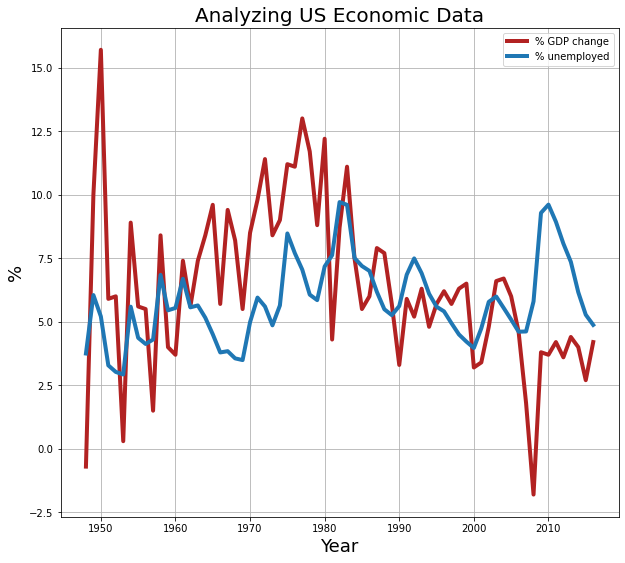

In [34]:
make_dashboard(x,gdp_change,unemployment,title,file_name)

<h3 id="Section_5">Save the dashboard on IBM cloud and display it  </h3>

Getting the Service Credentials from the instance of your IBM Cloud Storage something similar to the format given below

<code>
credentials = {<br>
 &nbsp; "apikey": "your-api-key",<br>
 &nbsp; "cos_hmac_keys": {<br>
 &nbsp;  "access_key_id": "your-access-key-here", <br>
 &nbsp;   "secret_access_key": "your-secret-access-key-here"<br>
 &nbsp; },<br>
</code>
<code>
   &nbsp;"endpoints": "your-endpoints",<br>
 &nbsp; "iam_apikey_description": "your-iam_apikey_description",<br>
 &nbsp; "iam_apikey_name": "your-iam_apikey_name",<br>
 &nbsp; "iam_role_crn": "your-iam_apikey_name",<br>
 &nbsp;  "iam_serviceid_crn": "your-iam_serviceid_crn",<br>
 &nbsp;"resource_instance_id": "your-resource_instance_id"<br>
}
</code>

In [15]:
# @hidden_cell
credentials={
  "apikey": "49WEY6Xj36iqUzgGcA2p3lUYYBWIs9kxAFe4Pmr99EB9",
  "cos_hmac_keys": {
    "access_key_id": "2c2773fc540440f49392f82332b6348b",
    "secret_access_key": "00045b3449e3e06f894e6088d39e683e19e13e5b2f26b8fc"
  },
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key 2c2773fc-5404-40f4-9392-f82332b6348b",
  "iam_apikey_name": "Storing US Data",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/a61b80c5a9624ecf8d9e18a2997a1727::serviceid:ServiceId-ed81a1e6-2761-4456-82ee-b19f1d448532",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/a61b80c5a9624ecf8d9e18a2997a1727:97b05326-18f1-4054-8297-a9f60f328e97::"
}

You will need the endpoint make sure the setting are the same as <i> PROVISIONING AN OBJECT STORAGE INSTANCE ON IBM CLOUD </i> assign the name of your bucket to the variable  <code>bucket_name </code> 

In [16]:
endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'

From the tutorial <i> PROVISIONING AN OBJECT STORAGE INSTANCE ON IBM CLOUD </i> assign the name of your bucket to the variable  <code>bucket_name </code> 

In [17]:
bucket_name ="pandas-donotdelete-pr-446isxaxj6ku95"

In [18]:
import boto3       # importing boto3 to access IBM Cloud Object Storage
resource = boto3.resource(
    's3',
    aws_access_key_id = credentials["cos_hmac_keys"]['access_key_id'],
    aws_secret_access_key = credentials["cos_hmac_keys"]["secret_access_key"],
    endpoint_url = endpoint,
)

We are going to use  <code>open</code> to create a file object. To get the path of the file, you are going to concatenate the name of the file stored in the variable <code>file_name</code>. The directory stored in the variable directory using the <code>+</code> operator and assign it to the variable 
<code>html_path</code>. We will use the function <code>getcwd()</code> to find current the working directory.

In [35]:
import os

directory = os.getcwd()
html_path = directory + "/" + file_name

Use the function f = open(html_path, mode) to create a file object and assign it to the variable f. The parameter file should be the variable html_path, the mode should be "r" for read.

In [36]:
f=open(html_path,"r")

To load your dataset into the bucket we will use the method <code>put_object</code>, you must set the parameter name to the name of the bucket, the parameter <code>Key</code> should be the name of the HTML file and the value for the parameter Body  should be set to <code>f.read()</code>.

In [37]:
resource.Bucket(name=bucket_name).put_object(Key=file_name,Body=f.read() )

s3.Object(bucket_name='pandas-donotdelete-pr-446isxaxj6ku95', key='index.html')

In the dictionary Params provide the bucket name as the value for the key 'Bucket'. Also for the value of the key 'Key' add the name of the html file, both values should be strings.

In [38]:
Params={'Bucket':'pandas-donotdelete-pr-446isxaxj6ku95','Key':'index.html'}

The following lines of code will generate a URL to share your dashboard. The URL only last 10 days

In [39]:
import sys
time = 10*24*60**2
client = boto3.client(
    's3',
    aws_access_key_id = credentials["cos_hmac_keys"]['access_key_id'],
    aws_secret_access_key = credentials["cos_hmac_keys"]["secret_access_key"],
    endpoint_url=endpoint,

)
url = client.generate_presigned_url('get_object',Params=Params,ExpiresIn=time)
print(url)

https://s3-api.us-geo.objectstorage.softlayer.net/pandas-donotdelete-pr-446isxaxj6ku95/index.html?AWSAccessKeyId=2c2773fc540440f49392f82332b6348b&Signature=OHtddGk35A%2BRNETBc0PJMKYzS58%3D&Expires=1588683494
